## Basic Plotting: Line Plots

The most basic plots are line plots. You can plot a line by calling plot on two vectors of numbers. For example:

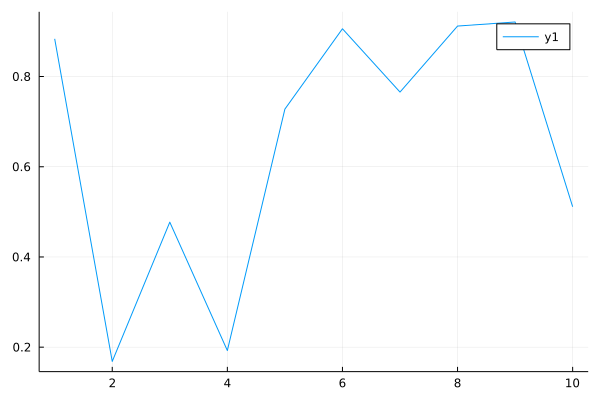

In [4]:
using Plots
x = 1:10
y = rand(10) # These are the plotting data

plot(x, y)

The plot is displayed in a plot pane, a stand-alone window or the browser, depending on the environment and backend (see below).

In Plots.jl, every column is a series, i.e. a set of related points which form lines, surfaces, or other plotting primitives. Thus we can plot multiple lines by plotting a matrix of values and each column is interpreted as a separate line:

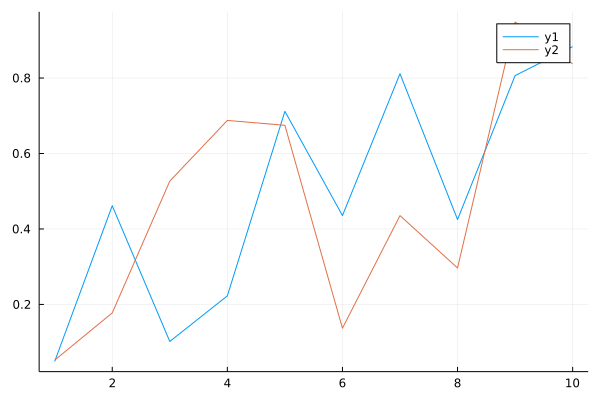

In [5]:
x = 1:10
y = rand(10, 2) # 2 columns means two lines
plot(x, y)

Additionally, we can add more lines by mutating the plot object. This is done by the plot! command. Let's add another line to our current plot:

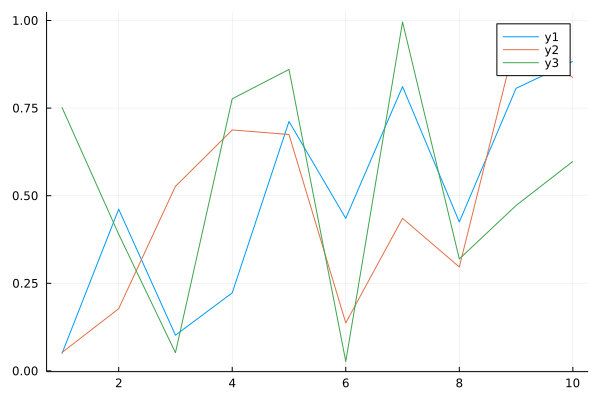

In [6]:
z = rand(10)
plot!(x, z)

Note that we could have done the same as above using an explicit plot variable:

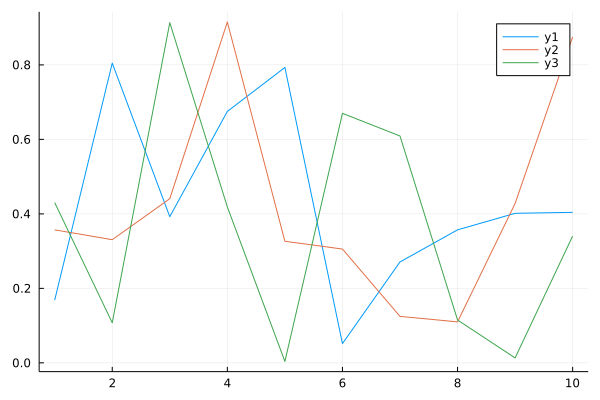

In [7]:
x = 1:10; y = rand(10, 2) # 2 columns means two lines
p = plot(x, y)
z = rand(10)
plot!(p, x, z)

Note that in the case where p is omitted, Plots.jl uses the global Plots.CURRENT_PLOT automatically in the same manner.

## Plot Attributes

In the previous section we made plots... we're done right? No! We need to style our plots. In Plots.jl, the modifiers to plots are called attributes. Plots.jl follows a simple rule with data vs attributes: positional arguments are input data, and keyword arguments are attributes. Thus something like plot(x,y,z) is 3-dimensional data for 3D plots, while plot(x,y,attribute=value) is 2-dimensional with an attribute.

As an example, we see that from the attributes page that we can increase the line width using linewidth (or its alias lw), change the legend's labels using the label command, and add a title with title. Let's apply that to our previous plot:

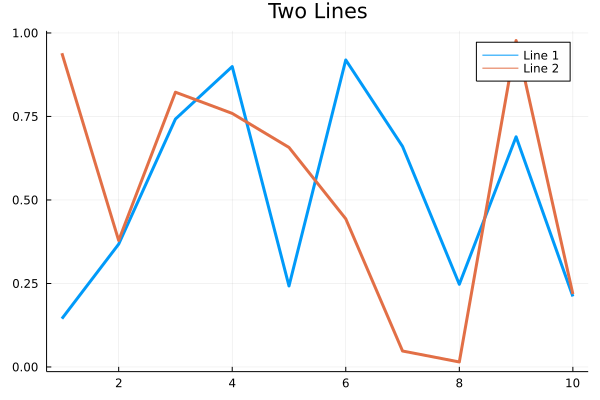

In [8]:
x = 1:10
y = rand(10, 2) # 2 columns means two lines
plot(x, y, title = "Two Lines", label = ["Line 1" "Line 2"], lw = 3)

Note that every attribute can also be applied by mutating the plot with a modifier function. For example, the xlabel attribute adds a label for the x-axis. We can in the plot command specify it via xlabel=... like we did above. Or we can use the modifier function to add it after the plot has already been generated:

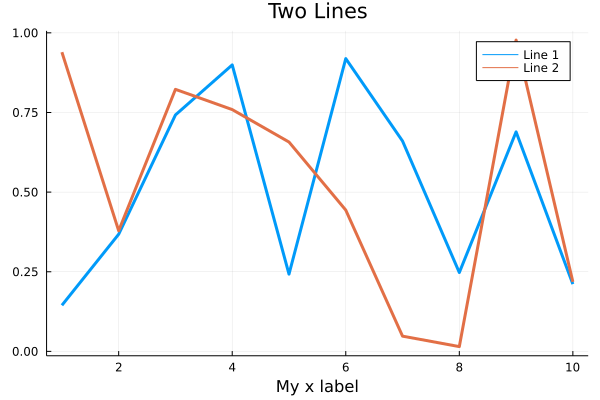

In [9]:
xlabel!("My x label")

Every modifier function is the name of the attribute followed by !. Note that this implicitly uses the global Plots.CURRENT_PLOT and we can apply it to other plot objects via attribute!(p,value). 

Attributes
Introduction to Attributes
In Plots, input data is passed positionally (for example, the y in plot(y)), and attributes are passed as keywords (for example, plot(y, color = :blue)). Most of the information on this page is available from your Julia REPL. After one executes, using Plots in the REPL, one can use the function plotattr() to print a list of all attributes for either series, plots, subplots, or axes.

# Valid Operations
plotattr(:Plot)
plotattr(:Series)
plotattr(:Subplot)
plotattr(:Axis)
Once you acquire the list of attributes, you can either use the aliases of a specific attribute or investigate a specific attribut to print that attribute's aliases and its description.

julia> # Specific Attribute Example
       plotattr("size")
size {NTuple{2,Int}}
sizes, windowsize, wsize

(width_px, height_px) of the whole Plot
Plot attribute,  default: (600, 400)

Note
Do not forget to enclose the attribute you are attempting to use with double quotes!

Aliases
Keywords can take a range of values through the alias mechanic. For example, plot(y, color = :blue) is really interpreted as plot(y, seriescolor = :blue). Each attribute has a number of aliases (see the charts below), which are available to avoid the pain of constantly looking up plotting API documentation because you forgot the argument name. c, color, and seriescolor all mean the same thing, and in fact those are eventually converted into the more precise attributes linecolor, markercolor, markerstrokecolor, and fillcolor (which you can then override if desired).

Tip
Use aliases for one-off analysis and visualization, but use the true keyword name for long-lived library code to avoid confusion.

Tip
As of this writing, aliases do not work inside recipes!!

Magic Arguments
Some arguments encompass smart shorthands for setting many related arguments at the same time. Plots uses type checking and multiple dispatch to smartly "figure out" which values apply to which argument. Pass in a tuple of values. Single values will be first wrapped in a tuple before processing.

axis (and xaxis/yaxis/zaxis)
Passing a tuple of settings to the xaxis argument will allow the quick definition of xlabel, xlims, xticks, xscale, xflip, and xtickfont. The following are equivalent:

plot(y, xaxis = ("my label", (0,10), 0:0.5:10, :log, :flip, font(20, "Courier")))

plot(y,
    xlabel = "my label",
    xlims = (0,10),
    xticks = 0:0.5:10,
    xscale = :log,
    xflip = true,
    xtickfont = font(20, "Courier")
)
Note that yaxis and zaxis work similarly, and axis will apply to all.

Passing a tuple to xticks (and similarly to yticks and zticks) changes the position of the ticks and the labels:

plot!(xticks = ([0:π:3*π;], ["0", "\\pi", "2\\pi"]))
yticks!([-1:1:1;], ["min", "zero", "max"])
line
Set attributes corresponding to a series line. Aliases: l. The following are equivalent:

plot(y, line = (:steppre, :dot, :arrow, 0.5, 4, :red))

plot(y,
    seriestype = :steppre,
    linestyle = :dot,
    arrow = :arrow,
    linealpha = 0.5,
    linewidth = 4,
    linecolor = :red
)
fill
Set attributes corresponding to a series fill area. Aliases: f, area. The following are equivalent:

plot(y, fill = (0, 0.5, :red))

plot(y,
    fillrange = 0,
    fillalpha = 0.5,
    fillcolor = :red
)
marker
Set attributes corresponding to a series marker. Aliases: m, mark. The following are equivalent:

scatter(y, marker = (:hexagon, 20, 0.6, :green, stroke(3, 0.2, :black, :dot)))

scatter(y,
    markershape = :hexagon,
    markersize = 20,
    markeralpha = 0.6,
    markercolor = :green,
    markerstrokewidth = 3,
    markerstrokealpha = 0.2,
    markerstrokecolor = :black,
    markerstrokestyle = :dot
)
Notable Arguments
This is a collection of some notable arguments that are not well-known:

scatter(y, thickness_scaling = 2)  # increases fontsizes and linewidth by factor 2
# good for presentations and posters
# If backend does not support this, use the function `scalefontsizes(2)` that scales
# the default fontsizes.


scatter(y, ticks=:native)  # Tells backends to calculate ticks by itself.
# Good idea if you use interactive backends where you perform mouse zooming

scatter(rand(100), smooth=true)  # Adds a regression line to your plots

### Changing the Plotting Series
At this point you're a master of lines, but don't you want to plot your data in other ways? In Plots.jl, these other ways of plotting a series is called a series type. A line is one series type. However, a scatter plot is another series type which is commonly used. We can change the series type by the seriestype attribute:

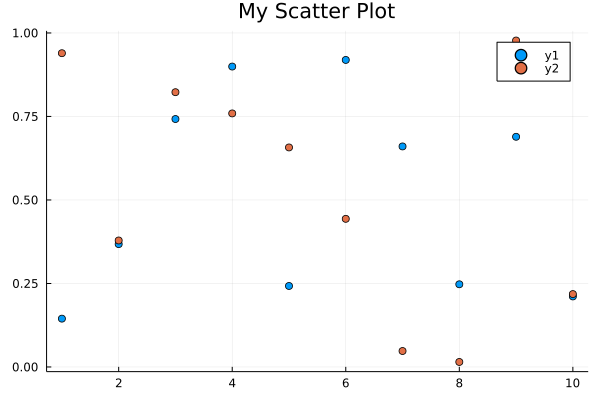

In [10]:
plot(x, y, seriestype = :scatter, title = "My Scatter Plot")

For each built-in series type, there is a shorthand function for directly calling that series type which matches the name of the series type. It handles attributes just the same as the plot command, and have a mutating form which ends in !. For example, we can instead do that scatter plot with:

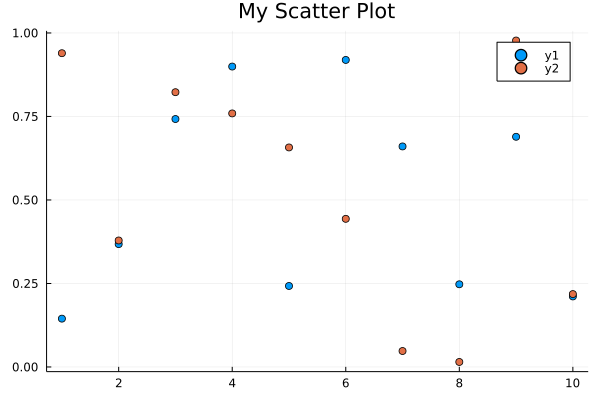

In [11]:
scatter(x, y, title = "My Scatter Plot")

## Plotting in Scripts
Now that you're making useful plots, go ahead and add these plotting commands to a script. Now call the script... and the plot doesn't show up? This is because Julia in interactive use calls display on every variable that is returned by a command without a ;. Thus in each case above, the interactive usage was automatically calling display on the returned plot objects.

In a script, Julia does not do automatic displays (which is why ; is not necessary). However, if we would like to display our plots in a script, this means we just need to add the display call. For example:

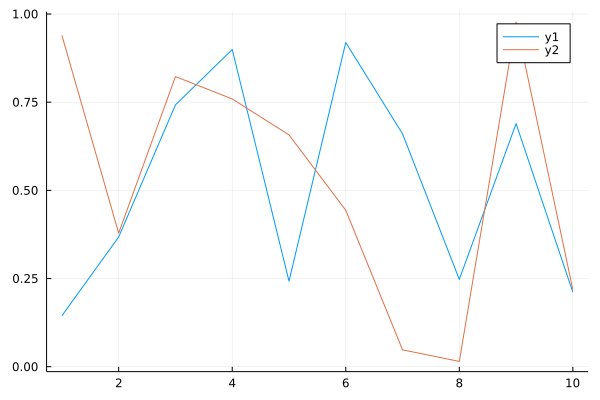

In [12]:
display(plot(x, y))

If we have a plot object p, we can do display(p) at any time.

### Combining Multiple Plots as Subplots
We can combine multiple plots together as subplots using layouts. There are many methods for doing this, and we will show two simple methods for generating simple layouts. More advanced layouts are shown in the Layouts page.

The first method is to define a layout which will split a series. The layout command takes in a 2-tuple layout=(N, M) which builds an NxM grid of plots. It will automatically split a series to be in each plot. For example, if we do layout=(4,1) on a plot with four series, then we will get four rows of plots, each with one series in it:

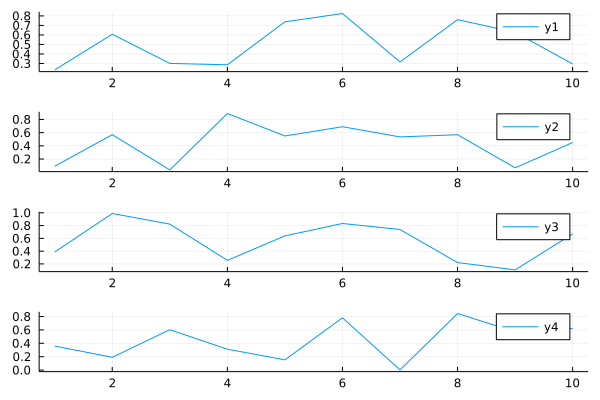

In [13]:
y = rand(10, 4)
plot(x, y, layout = (4, 1))

We can also use layouts on plots of plot objects. For example, we can generate for separate plots and make a single plot that combines them in a 2x2 grid via the following:

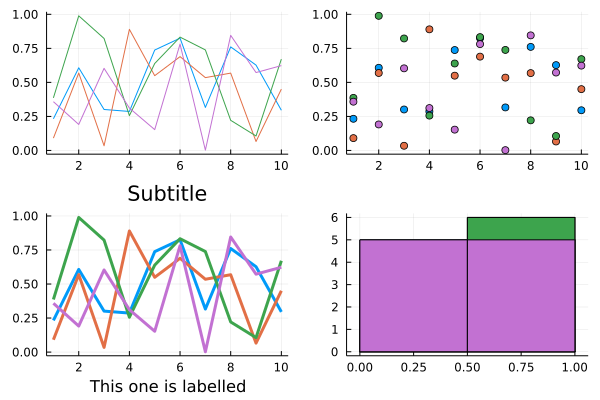

In [14]:
p1 = plot(x, y) # Make a line plot
p2 = scatter(x, y) # Make a scatter plot
p3 = plot(x, y, xlabel = "This one is labelled", lw = 3, title = "Subtitle")
p4 = histogram(x, y) # Four histograms each with 10 points? Why not!
plot(p1, p2, p3, p4, layout = (2, 2), legend = false)

Notice that the attributes in the individual plots are applied to the individual plots, while the attributes on the final plot call are applied to all of the subplots.

### Plot Recipes and Recipe Libraries
You now know all of the basic terminology of Plots.jl and can roam the documentation freely to become a plotting master. However, there is one thing left: recipes. Plotting recipes are extensions to the Plots.jl framework. They add:

1. New plot commands via user recipes.
2. Default interpretations of Julia types as plotting data via type recipes.
3. New functions for generating plots via plot recipes.
4. New series types via series recipes.

Writing your own recipes is an advanced topic described on the recipes page. Instead, we will introduce the ways that one uses a recipe.

Recipes are included in many recipe libraries. Two fundamental recipe libraries are PlotRecipes.jl and StatsPlots.jl. Let's look into StatsPlots.jl. StatsPlots.jl adds a bunch of recipes, but the ones we'll focus on are:

It adds a type recipe for Distributions.
It adds a plot recipe for marginal histograms.
It adds a bunch of new statistical plot series.
Besides recipes, StatsPlots.jl also provides a specialized macro from plotting directly from data tables.



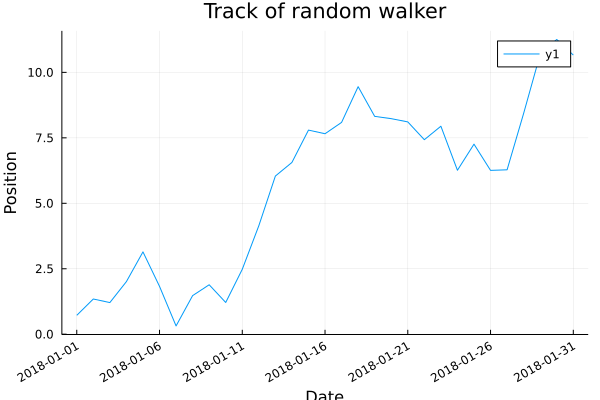

In [5]:
using Random, Dates, Plots

Random.seed!(2018)
days = 31
position = cumsum(randn(days))
x = Date(2018,1,1):Day(1):Date(2018,1,31)
ticks = [x[i] for i in 1:5:length(x)]

plot(x, position,
    xlabel="Date",
    ylabel="Position",
    title="Track of random walker",
    xticks=ticks,
    xrotation=30)